In [2]:
# importing the dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
# Data collection and processing

In [5]:
# Importing the data to the pandas dataframe
loan_dataset = pd.read_csv(r"D:\My Research\Load Status Prediction\train_u6lujuX_CVtuZ9i.csv")
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# number of rows and columns in the dataset
loan_dataset.shape

(614, 13)

In [7]:
# Measuring the statistical measures of the dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Nuumber of missing values in each column
loan_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_dataset = loan_dataset.dropna()

In [10]:
# Nuumber of missing values in each column
loan_dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Label Encoding
loan_dataset = loan_dataset.replace({"Loan_Status":{'Y':1,'N': 0}})

C:\Users\user\AppData\Local\Temp\ipykernel_19524\4198409338.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset = loan_dataset.replace({"Loan_Status":{'Y':1,'N': 0}})


In [12]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [13]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [14]:
loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [15]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

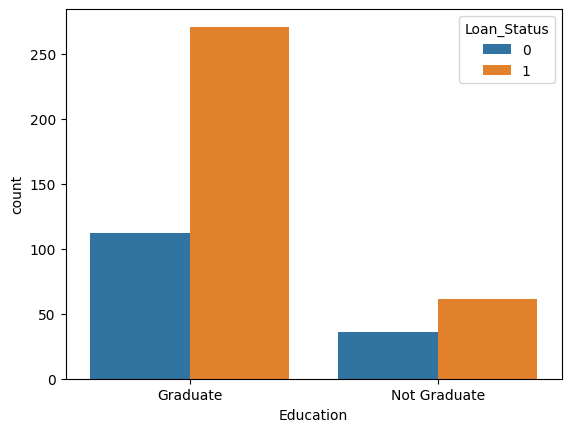

In [16]:
# Education and Loan status
sns.countplot(x = "Education", hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

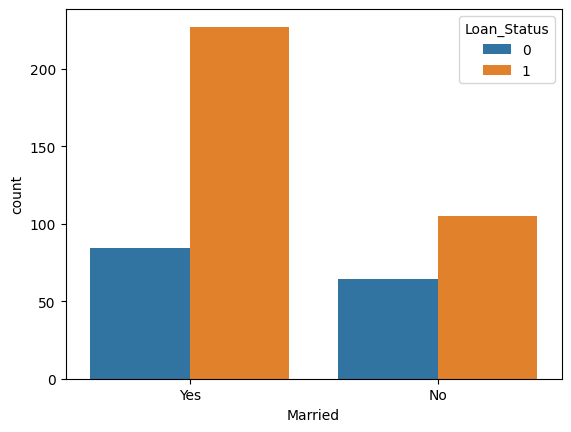

In [17]:
# Marital status and loan status
sns.countplot(x = "Married", hue = "Loan_Status", data = loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

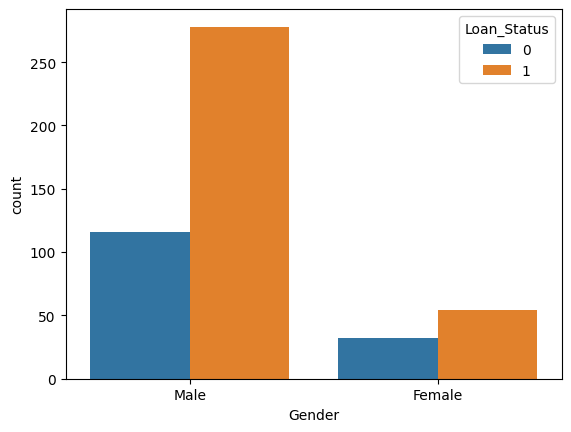

In [18]:
# Gender and Loan status
sns.countplot(x = "Gender", hue = "Loan_Status",data=loan_dataset)

In [19]:
loan_dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


In [20]:
# Convert the categorical columns into numerical values

loan_dataset.replace({"Gender": {'Male':1, 'Female':0}, "Married": {'Yes':1, 'No': 0}, "Education":{'Graduate': 1, 'Not Graduate':0}, "Self_Employed": {'Yes':1,'No':0}, "Property_Area": {'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace = True )

C:\Users\user\AppData\Local\Temp\ipykernel_19524\345092721.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Gender": {'Male':1, 'Female':0}, "Married": {'Yes':1, 'No': 0}, "Education":{'Graduate': 1, 'Not Graduate':0}, "Self_Employed": {'Yes':1,'No':0}, "Property_Area": {'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace = True )


In [21]:
loan_dataset.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [22]:
# Separating the data and label
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'])
Y = loan_dataset['Loan_Status']

In [23]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [24]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [25]:
# train_trest_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1, stratify = Y,random_state = 2 )

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [27]:
# Training the model
#Suppot Vector Machine Model

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
# Training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

Determining the accuracy score

In [30]:
# Accuracy score of the training data
training_data_prediction =  classifier.predict(X_train)
accuracy_score_training_data = accuracy_score(training_data_prediction, Y_train)
print("Accuracy Score on Training data: ", accuracy_score_training_data * 100, "%")

Accuracy Score on Training data:  79.86111111111111 %


In [31]:
# Accuracy score of the trtesting data

testing_data_prediction =  classifier.predict(X_test)
accuracy_score_training_data = accuracy_score(testing_data_prediction, Y_test)
print("Accuracy Score on Testing data: ", accuracy_score_training_data * 100, "%")

Accuracy Score on Testing data:  83.33333333333334 %


Text(0.5, 1.0, 'Loan Status prediction on training data')

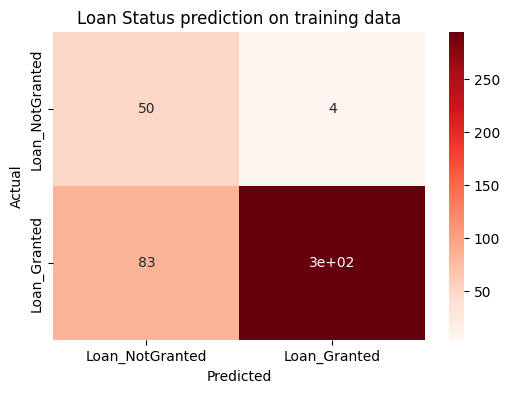

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
cm1 = confusion_matrix(training_data_prediction, Y_train)
plt.figure(figsize = (6,4))
sns.heatmap(cm1, annot=True, cmap="Reds",
            xticklabels=['Loan_NotGranted','Loan_Granted'],
            yticklabels=['Loan_NotGranted','Loan_Granted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Loan Status prediction on training data')

In [38]:
print(classification_report(training_data_prediction,Y_train,
                            target_names=['Loan_NotGranted','Loan_Granted']))

                 precision    recall  f1-score   support

Loan_NotGranted       0.38      0.93      0.53        54
   Loan_Granted       0.99      0.78      0.87       378

       accuracy                           0.80       432
      macro avg       0.68      0.85      0.70       432
   weighted avg       0.91      0.80      0.83       432



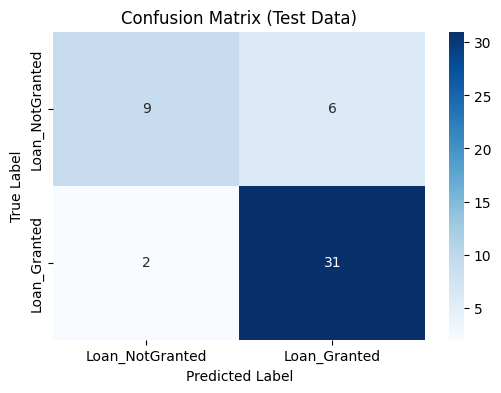

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix (Test Data)
cm2 = confusion_matrix(Y_test, testing_data_prediction)

plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, cmap="Blues",
            xticklabels=['Loan_NotGranted', 'Loan_Granted'],
            yticklabels=['Loan_NotGranted', 'Loan_Granted'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Data)")
plt.show()



In [43]:

# Classification report (Test Data)
print(classification_report(Y_test, testing_data_prediction,
                            target_names=['Loan_NotGranted', 'Loan_Granted']))

                 precision    recall  f1-score   support

Loan_NotGranted       0.82      0.60      0.69        15
   Loan_Granted       0.84      0.94      0.89        33

       accuracy                           0.83        48
      macro avg       0.83      0.77      0.79        48
   weighted avg       0.83      0.83      0.83        48

